# Creating a Dataset

In [1]:
import pandas as pd
from sklearn import datasets

import numpy as np
np.random.seed(254)

X,y = datasets.make_classification(n_samples=1000, n_features=2,n_informative=2, n_redundant=0
                                   ,n_repeated=0, n_classes=3, n_clusters_per_class=1)

df = pd.DataFrame({'f1':X[:,0],'f2':X[:,1],'category':y}
                 ,columns=['f1','f2','category'])

df.shape

(1000, 3)

In [2]:
df.head()

,f1,f2,category
0,1.316455,1.906756,0
1,0.499191,-1.668219,2
2,0.937946,0.834301,0
3,0.930180,0.648558,0
4,0.309252,-1.365109,2


In [3]:
df.describe()

,f1,f2,category
count,1000.000000,1000.000000,1000.000000
mean,0.332238,-0.299943,0.998000
std,1.142013,1.516528,0.818942
min,-2.234235,-5.113364,0.000000
25%,-0.779555,-1.399917,0.000000
50%,0.568081,-0.391351,1.000000
75%,1.221679,0.795395,2.000000
max,3.724172,4.034715,2.000000


In [4]:
df['category'].value_counts()

0    336
2    334
1    330
Name: category, dtype: int64

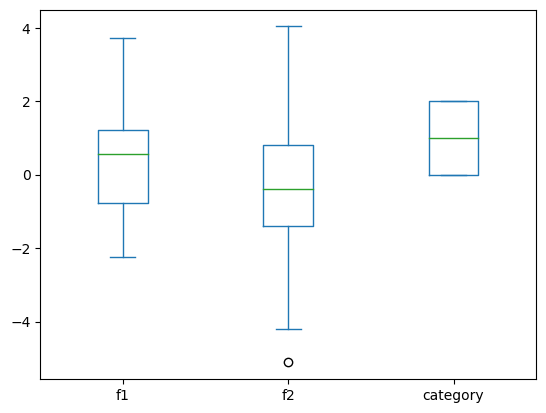

In [5]:
import matplotlib.pyplot as plt
from matplotlib import pylab

df.plot.box()
plt.show()

In [6]:
# from matplotlib import colormaps
# list(colormaps)

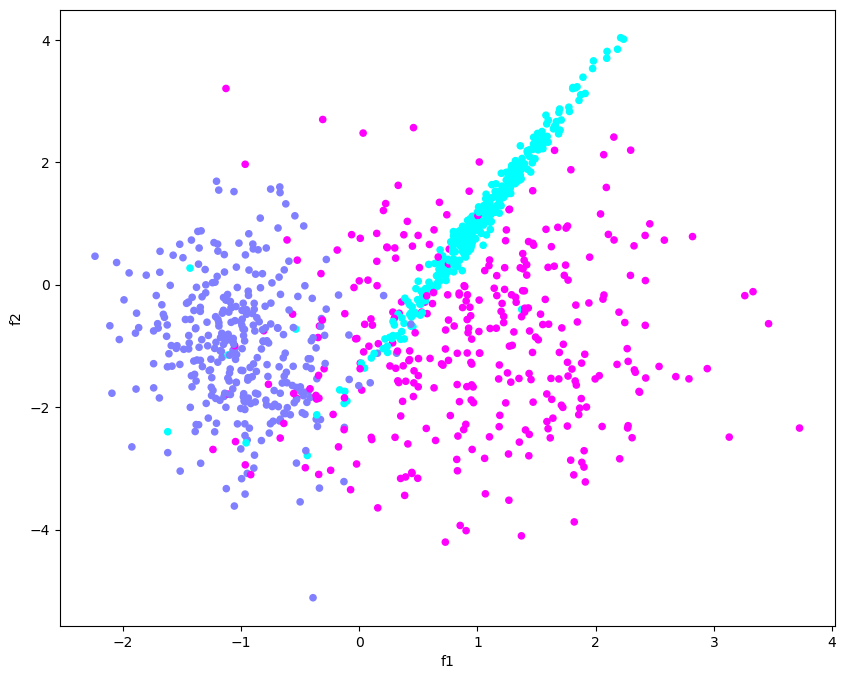

In [7]:
df.plot.scatter('f1','f2',c='category',cmap=pylab.cm.cool,figsize=(10,8),colorbar=False)
plt.show()

# Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized = scaler.fit_transform(df[['f1','f2']])
standardized

array([[ 0.86225717,  1.45582779],
       [ 0.14626453, -0.90269403],
       [ 0.53065139,  0.74829594],
       ...,
       [-1.11216242, -1.02386509],
       [ 1.82951322,  0.24260611],
       [ 0.12922246,  0.15564846]])

In [9]:
df_scaled = df.copy()
df_scaled.loc[:,['f1','f2']] = standardized

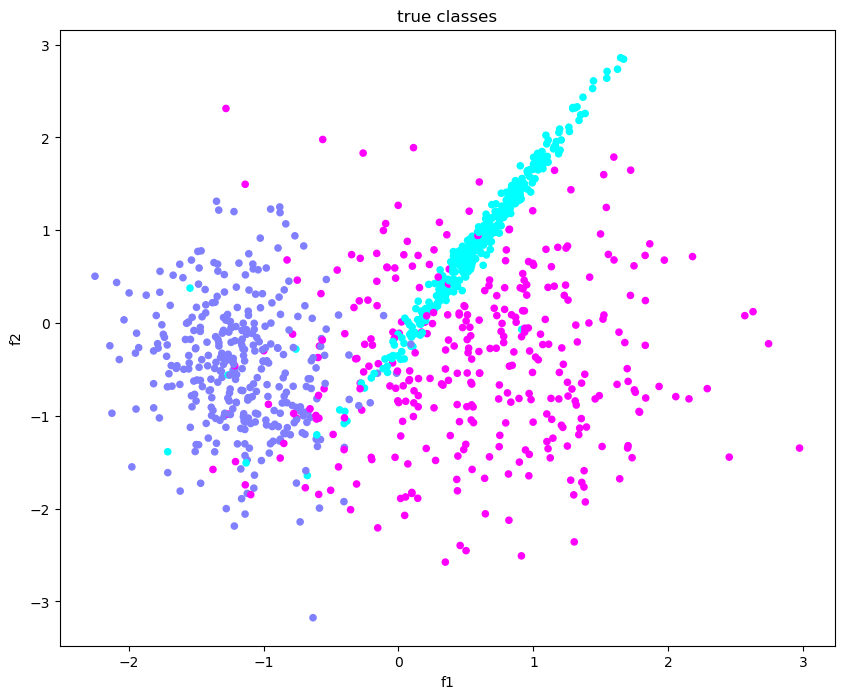

In [15]:
df_scaled.plot.scatter('f1','f2',c='category',cmap=pylab.cm.cool,title='true classes',figsize=(10,8),colorbar=False)
plt.show()

# K-Means Clustering

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df_scaled[["f1", "f2"]])

df_scaled["kmeans_cluster"] = kmeans.predict(df_scaled[["f1", "f2"]])

C:\Users\malir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\malir\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\malir\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\malir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are 

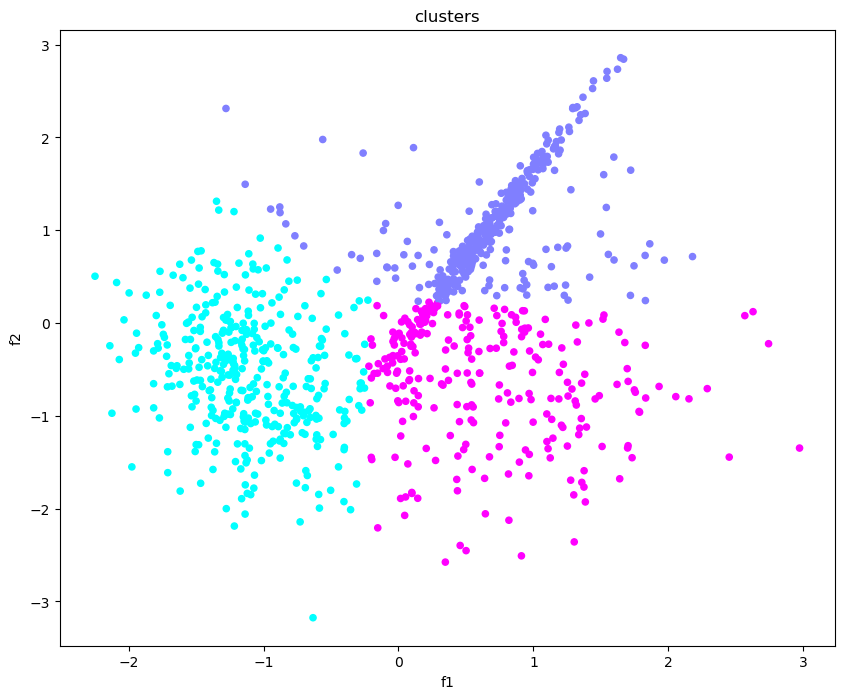

In [14]:
df_scaled.plot.scatter('f1','f2',c="kmeans_cluster",cmap=pylab.cm.cool,title='clusters',figsize=(10,8),colorbar=False)
plt.show()

how would our clusters fare wrt "category"?

In [37]:
tmp = df_scaled[['kmeans_cluster','category']].value_counts()
tmp = tmp[~tmp.index.get_level_values(1).duplicated(keep="first")]

most_common_pairs = tmp.iloc[:3] 
most_common_pairs

kmeans_cluster  category
1               1           319
0               0           269
2               2           210
dtype: int64

In [38]:
c_dict = dict(most_common_pairs.index.tolist())
df_scaled["kmeans_cluster"] = df_scaled["kmeans_cluster"].map(lambda x: c_dict[x])

### Metrics

In [41]:
from sklearn import metrics

confm = metrics.confusion_matrix(df_scaled['category'],df_scaled['kmeans_cluster'])
confm_df = pd.DataFrame(confm)
confm_df.index.name = "True"
confm_df.columns.name = "Pred"
confm_df

Pred,0,1,2
True,,,
0,269,13,54
1,6,319,5
2,79,45,210


In [42]:
print("Accuracy:",  metrics.accuracy_score(df_scaled["category"], df_scaled["kmeans_cluster"]))
print("Precision:", metrics.precision_score(df_scaled["category"], df_scaled["kmeans_cluster"], average="weighted"))
print("Recall:",    metrics.recall_score(df_scaled["category"], df_scaled["kmeans_cluster"], average="weighted"))
print("F-measure:", metrics.f1_score(df_scaled["category"], df_scaled["kmeans_cluster"], average="weighted"))

Accuracy: 0.798
Precision: 0.7952962975528662
Recall: 0.798
F-measure: 0.7924129182511279


# K-Nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X=df[['f1','f2']],y=df.category)
df_scaled['knn_pred'] = knn.predict(df[['f1','f2']])
df_scaled

,f1,f2,category,kmeans_cluster,knn_pred
0,0.862257,1.455828,0,0,0
1,0.146265,-0.902694,2,2,2
2,0.530651,0.748296,0,0,0
3,0.523847,0.625756,0,0,0
4,-0.020138,-0.702723,2,2,2
...,...,...,...,...,...
995,1.646300,2.859708,0,0,0
996,0.161712,-0.129784,0,2,0
997,-1.112162,-1.023865,1,1,1
998,1.829513,0.242606,2,0,2


In [47]:
knn_metrics = metrics.precision_recall_fscore_support(df_scaled.category,df_scaled.knn_pred)
knn_metrics

(array([0.88108108, 0.898017  , 0.94945848]),
 array([0.9702381 , 0.96060606, 0.78742515]),
 array([0.92351275, 0.92825769, 0.8608838 ]),
 array([336, 330, 334], dtype=int64))

In [48]:
print("Accuracy:",  metrics.accuracy_score(df_scaled["category"], df_scaled["knn_pred"]))
print("Precision:", metrics.precision_score(df_scaled["category"], df_scaled["knn_pred"], average="weighted"))
print("Recall:",    metrics.recall_score(df_scaled["category"], df_scaled["knn_pred"], average="weighted"))
print("F-measure:", metrics.f1_score(df_scaled["category"], df_scaled["knn_pred"], average="weighted"))

Accuracy: 0.906
Precision: 0.9095079858824062
Recall: 0.906
F-measure: 0.9041605081053793


# One-VS-Rest with linear classifiers

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X=df[['f1','f2']],y=df.category)
df_scaled['lr'] = lr.predict(df[['f1','f2']])
df_scaled

,f1,f2,category,kmeans_cluster,knn_pred,lr
0,0.862257,1.455828,0,0,0,0
1,0.146265,-0.902694,2,2,2,2
2,0.530651,0.748296,0,0,0,0
3,0.523847,0.625756,0,0,0,0
4,-0.020138,-0.702723,2,2,2,2
...,...,...,...,...,...,...
995,1.646300,2.859708,0,0,0,0
996,0.161712,-0.129784,0,2,0,2
997,-1.112162,-1.023865,1,1,1,1
998,1.829513,0.242606,2,0,2,2


In [50]:
lr_metrics = metrics.precision_recall_fscore_support(df_scaled.category,df_scaled.knn_pred)
lr_metrics

(array([0.88108108, 0.898017  , 0.94945848]),
 array([0.9702381 , 0.96060606, 0.78742515]),
 array([0.92351275, 0.92825769, 0.8608838 ]),
 array([336, 330, 334], dtype=int64))

In [51]:
print("Accuracy:",  metrics.accuracy_score(df_scaled["category"], df_scaled["lr"]))
print("Precision:", metrics.precision_score(df_scaled["category"], df_scaled["lr"], average="weighted"))
print("Recall:",    metrics.recall_score(df_scaled["category"], df_scaled["lr"], average="weighted"))
print("F-measure:", metrics.f1_score(df_scaled["category"], df_scaled["lr"], average="weighted"))

Accuracy: 0.844
Precision: 0.8419606304060084
Recall: 0.844
F-measure: 0.8421648493914347


# Decision Boundaries

In [66]:
n_steps = 80

xmin, xmax = df_scaled.f1.min(), df_scaled.f1.max()
ymin, ymax = df_scaled.f2.min(), df_scaled.f2.max()

xstep = (xmax - xmin)/(n_steps - 1)
ystep = (ymax - ymin)/(n_steps - 1)

xs = np.arange(xmin, xmax, xstep)
ys = np.arange(ymin, ymax, ystep)

grid_xs, grid_ys = np.meshgrid(xs, ys)

df_grid = pd.DataFrame({"f1": grid_xs.flatten(), "f2": grid_ys.flatten()})

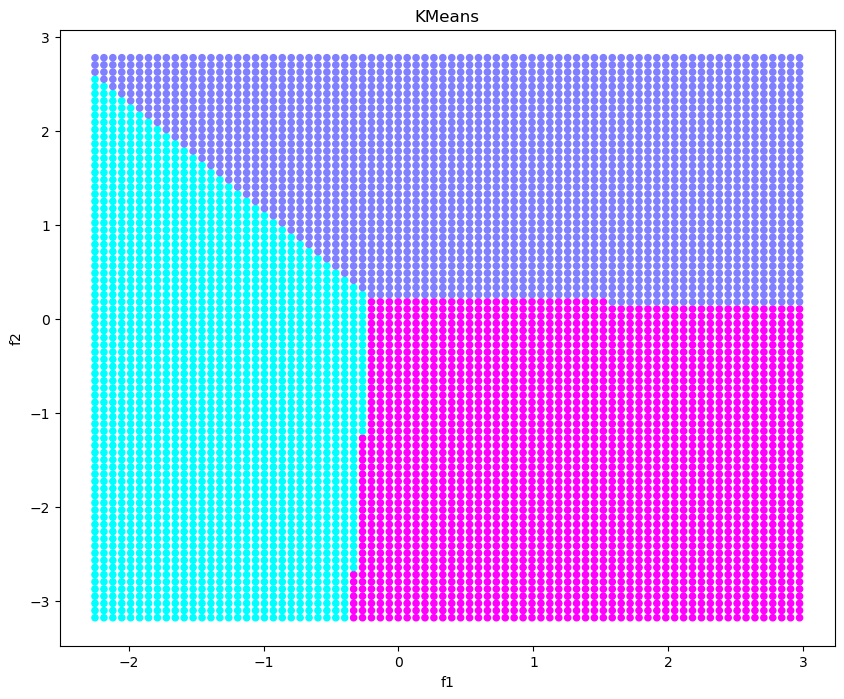

In [68]:
df_grid["kmeans_cluster"] = kmeans.predict(df_grid[["f1", "f2"]])
df_grid.plot.scatter("f1", "f2", c="kmeans_cluster", cmap=pylab.cm.cool,title='KMeans',figsize=(10,8), colorbar=False)
plt.show()

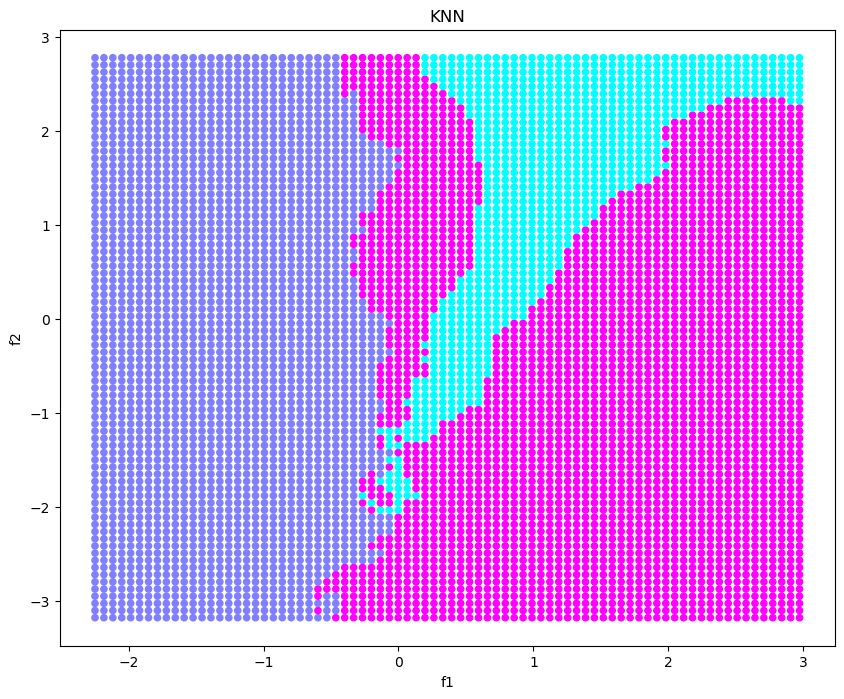

In [70]:
df_grid["knn_predict"] =  knn.predict(df_grid[["f1", "f2"]])
df_grid.plot.scatter("f1", "f2", c="knn_predict", cmap=pylab.cm.cool,title='KNN',figsize=(10,8), colorbar=False)
plt.show()

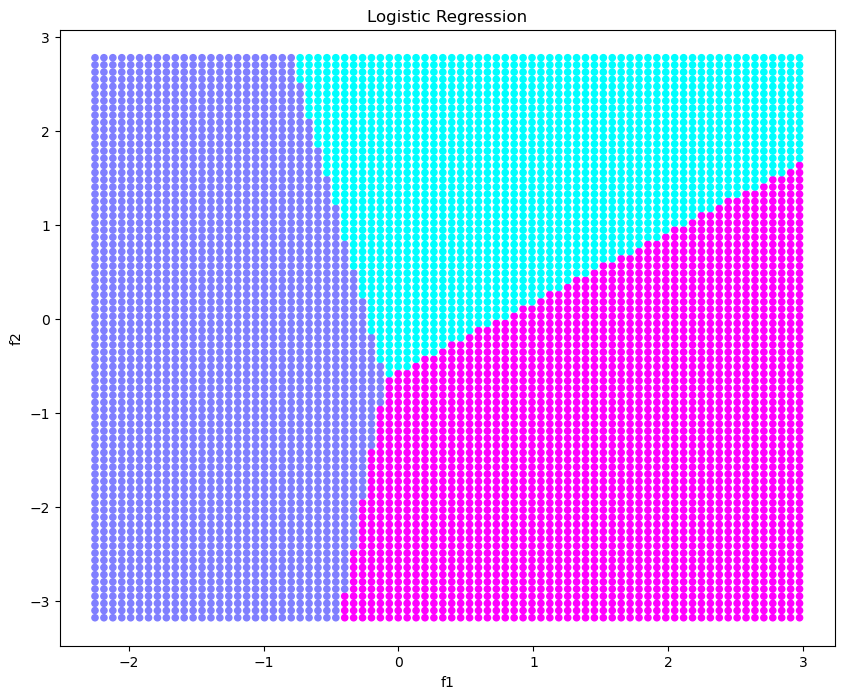

In [71]:
df_grid["lr_predict"] =  lr.predict(df_grid[["f1", "f2"]])
df_grid.plot.scatter("f1", "f2", c="lr_predict", cmap=pylab.cm.cool,title='Logistic Regression',figsize=(10,8), colorbar=False)
plt.show()

# Pipeline

In [75]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=10)

knn_pipe = Pipeline([("scaler",scaler),("knn",knn)])
knn.fit(df_scaled[['f1','f2']],df_scaled['category'])
df_scaled['pipe_predictions'] = knn.predict(df_scaled[['f1','f2']])

In [77]:
knn_pipe_metrics = metrics.precision_recall_fscore_support(df_scaled.category, df_scaled.pipe_predictions)
knn_pipe_metrics

(array([0.88586957, 0.90056818, 0.95357143]),
 array([0.9702381 , 0.96060606, 0.7994012 ]),
 array([0.92613636, 0.92961877, 0.86970684]),
 array([336, 330, 334], dtype=int64))

In [79]:
for i in range(3):
    print(knn_metrics[i] - knn_pipe_metrics[i])

[-0.00478848 -0.00255118 -0.00411294]
[ 0.          0.         -0.01197605]
[-0.00262362 -0.00136108 -0.00882304]
